Scalping usando de price action

In [ ]:
#pip install yfinance
#pip install mpl_finance  libreria para hacer diagramas de vela 
#pip install Ta


In [3]:
import pandas as pd
import numpy as np 
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta 


In [22]:
#el codigote permitira cambiar los graficos a modo oscuto para aquellos que opteis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl 
from matplotlib import cycler
colors = cycler('color',
                ["#669FEE", '#66EE91', '#9988DD', 
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor = 'none',
       axisbelow = True, grid=True, prop_cycle= colors,
       labelcolor ='gray')
plt.rc('grid', color='#474A4A', linestyle = 'solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction = 'out', color = 'gray')
plt.rc('legend', facecolor='#313233', edgecolor='313233')
plt.rc('text', color='#C9C9C9')
plt.rcParams[ 'figure.figsize'] = [20, 8]







Importar los Datos


In [21]:
#importar los precios de las acciones de yahoo finanzas
df = yf.download('EURUSD=X', start="2010-01-01")

#creamos una cokumna de fecha para dibujar el Candlestick mas tsarde (no es obligartorio si no quieres representarlo)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

#cambiar el nombre de las columnas 
df.columns = ['open', 'high', 'low', 'close', 'adj close ', 'volume', 'date']
df.index.name = 'time'
df




[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume,date
time,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,14610.0
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,14613.0
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,14614.0
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,14615.0
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,14616.0
...,...,...,...,...,...,...,...
2024-11-27,1.049120,1.058347,1.047548,1.049120,1.049120,0,20054.0
2024-11-28,1.056245,1.056524,1.052920,1.056245,1.056245,0,20055.0
2024-11-29,1.056301,1.059547,1.054296,1.056301,1.056301,0,20056.0


Crear el soporte y la resistencia

In [33]:
#creamos columnas vacias
df['support'] = np.nan
df['resistance'] = np.nan

#despues de 5descensos consecutivos den minimo anotamos este precio como el soporte
df.loc[(df['low'].shift(5) > df['low'].shift(4)) &
       (df['low'].shift(4) > df['low'].shift(3)) &
       (df['low'].shift(3) > df['low'].shift(2)) &
       (df['low'].shift(2) > df['low'].shift(1)) &
       (df['low'].shift(1) > df['low'].shift(0)), 'support']= df['low']

#despues de 5 subidas consecutivas del maximo. observamos este precio como la resistencia 

df.loc[(df['high'].shift(5) < df ['high'].shift(4)) &
(df['high'].shift(4) < df['high'].shift(3)) &
(df['high'].shift(3) < df['high'].shift(2)) &
(df['high'].shift(2) < df['high'].shift(1)) &
(df['high'].shift(1) < df['high'].shift(0)), 'resistance'] = df ['high'] 
        
        

In [35]:
df

,open,high,low,close,adj close,volume,date,support,resistance,resistence,SMA fast,SMA slow,rsi,rsi yesterday,signal,smooth resistance,smooth support
time,,,,,,,,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,0,14610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,0,14613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,0,14614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,0,14615.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,0,14616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27,1.049120,1.058347,1.047548,1.049120,1.049120,0,20054.0,NaN,NaN,NaN,1.071428,1.088701,33.759212,25.696491,0,1.093338,1.049924
2024-11-28,1.056245,1.056524,1.052920,1.056245,1.056245,0,20055.0,NaN,NaN,NaN,1.070428,1.087838,44.014553,33.759212,0,1.093338,1.049924
2024-11-29,1.056301,1.059547,1.054296,1.056301,1.056301,0,20056.0,NaN,NaN,NaN,1.069539,1.086924,44.089858,44.014553,0,1.093338,1.049924


C:\Users\davit\AppData\Local\Temp\ipykernel_14484\3264053134.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


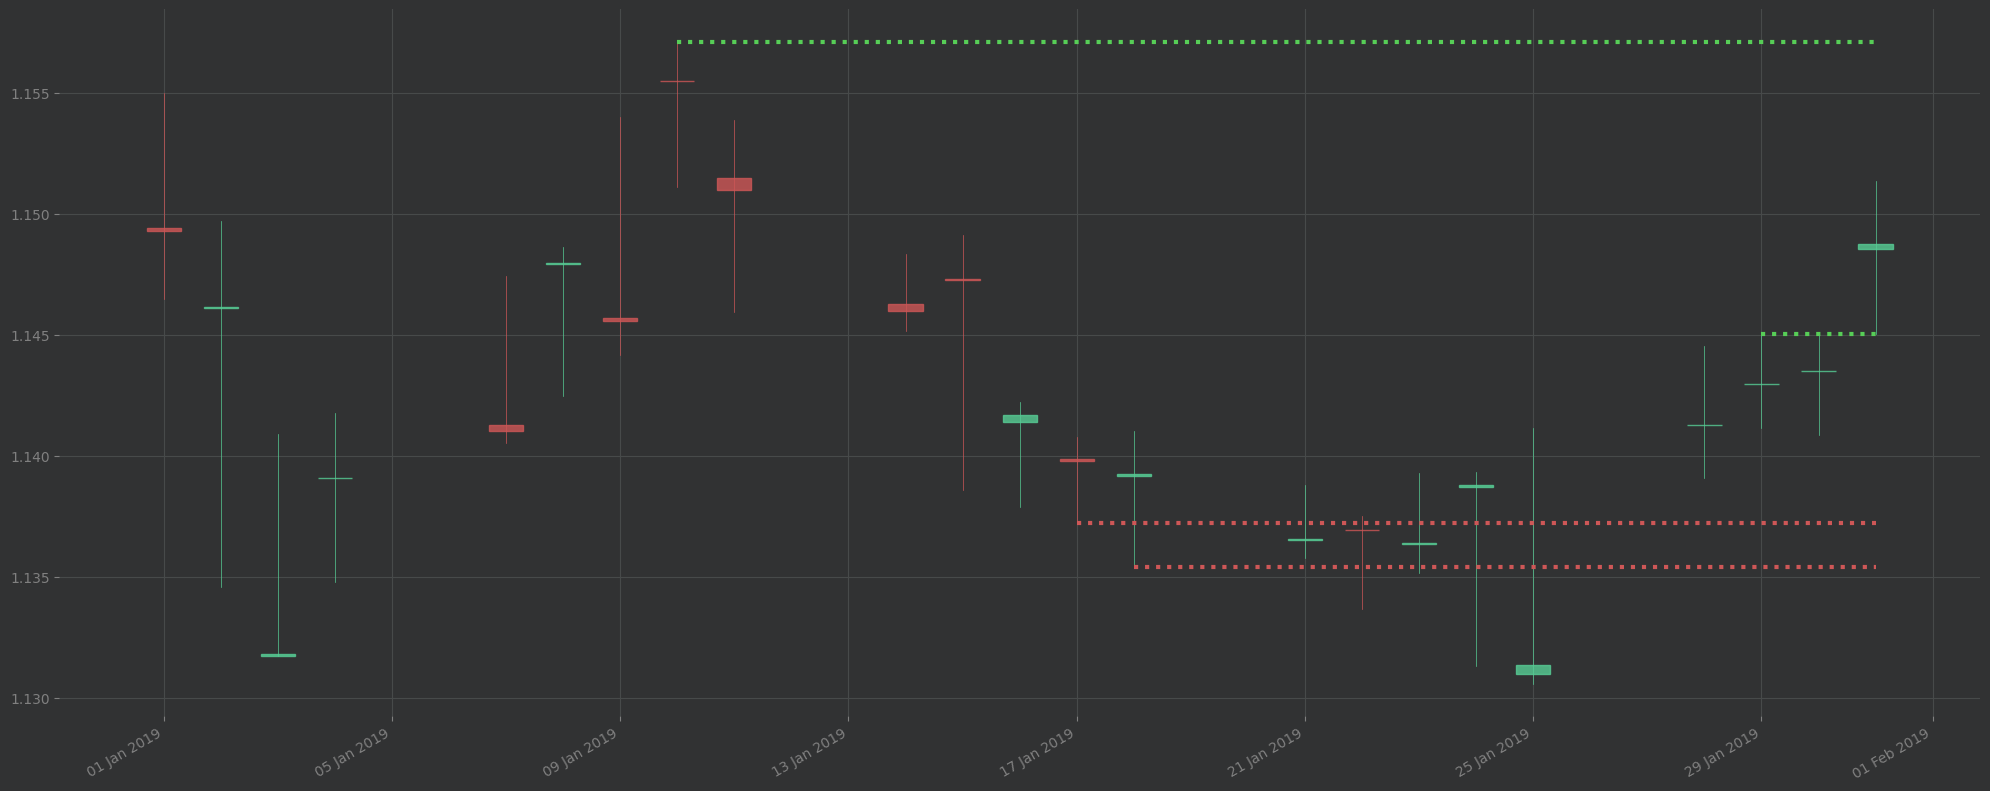

In [24]:
df_bis = df.loc['2019-01']

#iniciar el grafico 
fig, ax = plt.subplots()

#dibujar el candlestick
candlestick_ohlc(ax,df_bis[['date', 'open','high', 'low', 'close']]. values,width=0.6, \
                 colorup='#57CE95', colordown='#CE5757', alpha=0.8)

#poner la flecha como el eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

#representar lineas de resistencia}
for resistance, date in zip(df_bis['resistance'].dropna(), df_bis['resistance'].dropna().index):
    plt.hlines(resistance, xmin=date, xmax= df_bis.index[-1], colors= '#57CE57', linestyles=':', linewidth=3)

#representar lineas de soporte 

for support, date in zip(df_bis['support'].dropna(), df_bis['support'].dropna().index):
    plt.hlines(support, xmin=date, xmax=df_bis.index[-1], colors = '#CE5757', linestyles= ':', linewidth=3)

#representar la figura

fig.show()








C:\Users\davit\AppData\Local\Temp\ipykernel_17636\4081602882.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(df['support'].fillna(method='ffill'), color = '#CE5757', linestyle = ':', linewidth =3)
C:\Users\davit\AppData\Local\Temp\ipykernel_17636\4081602882.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plt.plot(df['resistance'].fillna(method='ffill'), color = '#57CE95', linestyle = ':', linewidth =3)
C:\Users\davit\AppData\Local\Temp\ipykernel_17636\4081602882.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


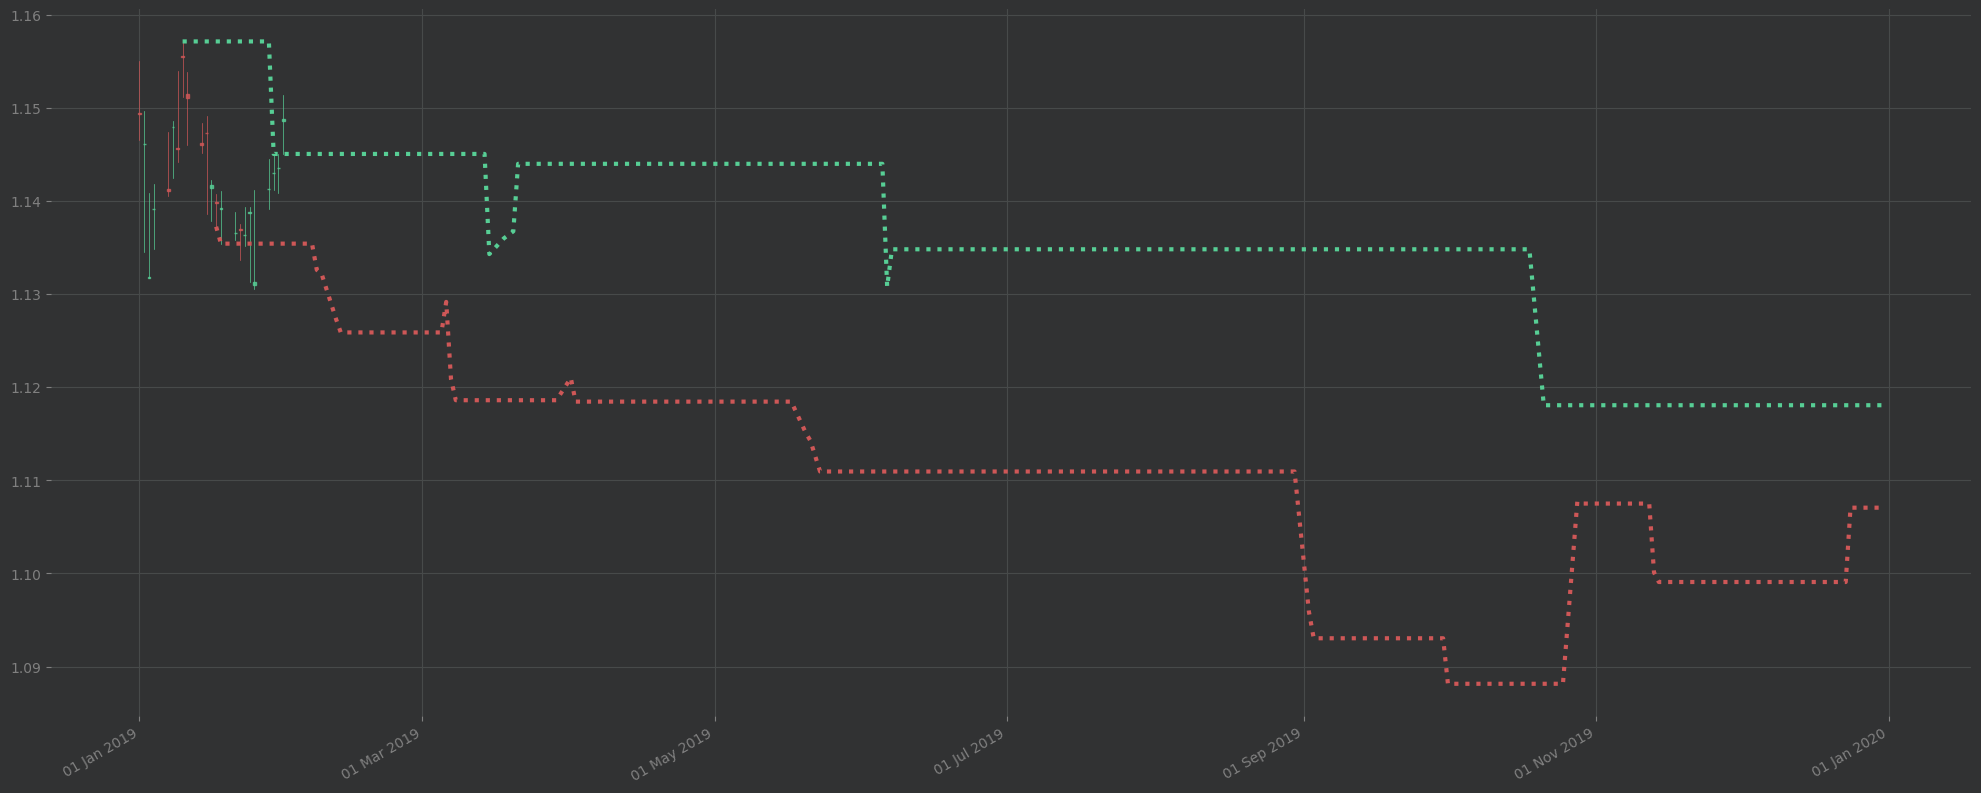

In [12]:
#tenemos un buen soporte sobre los valore que devo guiarme que pasaria si las 256 rayas son impordibles 
#pasarian a remplazar el NA
df = df.loc['2019']

#inicializar el grafico 
fig, ax = plt.subplots()

#representar el candelestick
candlestick_ohlc(ax,df_bis[['date', 'open','high', 'low', 'close']]. values,width=0.6, \
                 colorup='#57CE95', colordown='#CE5757', alpha=0.8)

#poner la fecha como eje X
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

#representar lineas de resistencia 

plt.plot(df['support'].fillna(method='ffill'), color = '#CE5757', linestyle = ':', linewidth =3)



plt.plot(df['resistance'].fillna(method='ffill'), color = '#57CE95', linestyle = ':', linewidth =3)

fig.show()



Estrategia de soporte y estrategia 


In [13]:
#para caada tipo de divisa son tendencias cuando el precio esta  alto vende cuando esta bajo vende 
#crear la señal
df['signal']= 0 

#suaabisar el soporte y la resistencia para crear la estrategia
df['smooth resistance'] = df['resistance'].fillna(method='ffill')
df['smooth support']= df['support'].fillna(method='ffill')

#crear condiciones de compra
condition_1_buy = (df ['close'].shift(1) < df['smooth resistance'].shift(1)) &\
                    (df['smooth support']* (1-0.0/100)>df['close'])


#crear condiciones de venta
condition_1_sell = (df ['close'].shift(1) > df['smooth resistance'].shift(1)) &\
                    (df['smooth support']* (1+0.5/100)>df['close'])


#colocar la señal
df.loc[condition_1_buy, 'signal']=1
df.loc[condition_1_sell, 'signal']= -1




C:\Users\davit\AppData\Local\Temp\ipykernel_17636\4244562942.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['smooth resistance'] = df['resistance'].fillna(method='ffill')
C:\Users\davit\AppData\Local\Temp\ipykernel_17636\4244562942.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['smooth support']= df['support'].fillna(method='ffill')


<Axes: xlabel='time'>

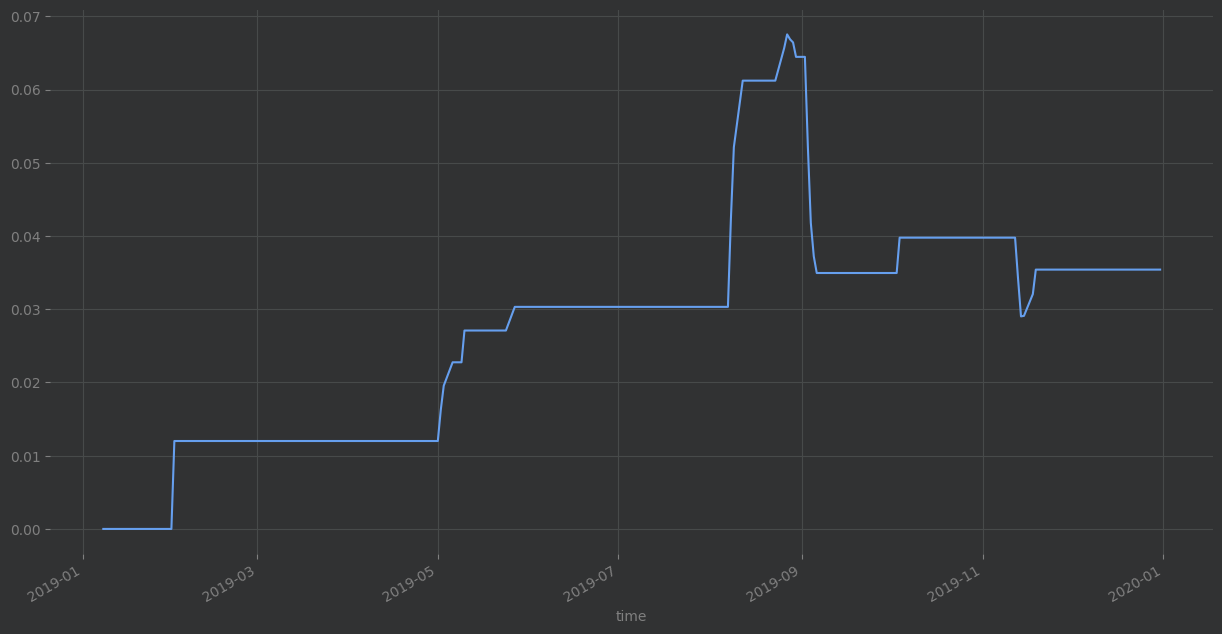

In [14]:
duration = 5 

#compute the percentage of variation of the asset
df['pct']= df ['close'].pct_change(1)

#compute the return of the strategy
df['return'] = np.array([df['pct'].shift(i) for i in range(duration)]).sum(axis=0) * (df['signal'].shift(duration))

df['return'].cumsum().plot(figsize=(15,8))

Soporte y resistencia 


In [ ]:
#perdemos muacho al aplicar esta estrategia  al momento de compra no es la mejor estrategia para el intra date
# es mejor cuando tenemos en cada minuto a un mercado del auro dolar para ver que clase de algoritmo estamos creando por que no 
#personalizar tu estra tegia para tener cada minuto para eseñar las mejores estrategias del mundo por el poco volumen del mercado en 
#forex  

In [ ]:
#crear media movil simple de 30 dias 
df[' SMA fast'] = df['close'].rolling(30).mean()

#crear media movil simple de 60 dias
df['SMA slow'] = df['close'].rolling(60).mean()

condition_2_buy = df['SMA fast'] > df['SMA slow']
condition_2_sell = df['SMA fast'] < df['SMA slow']

df['signal'] =0 

df.loc[condition_1_buy & condition_2_buy, 'signal'] =1
df.loc[condition_1_sell & condition_2_sell, 'signal'] = -1

#calcular el porcentaje de variaciones del activo
df['pct'] = df['close'].pct_change(1)


#calcular la rentabilidad de la estrategia
df['return'] = np.array([df['pct'].shift(i) for i in range(duration)]).sum(axis=0) * (df['signal'].shift(duration))

df['return'].cumsum().plot(figsize=(15,8))







Soport y Resistencia + SMA + RSI


In [38]:
#secrea columna rsi indice relativo de la fuerza 
df [ 'rsi'] = ta.momentum.RSIIndicator(df['close'], windoww = 10).rsi()

#para hacer la comparacion se compara con el dia anterior 
#RSI yesterday
df['rsi yesterday'] =  df ['rsi'].shift(1)

df['signal'] = 0
condition_3_buy = df['rsi'] < df['rsi yesterday']

condition_3_sell = df['rsi'] > df['rsi yesterday']

df.loc[condition_1_buy & condition_2_buy & condition_3_buy, 'signal']= 1
df.loc[condition_1_sell & condition_2_sell &condition_3_sell, 'signal']=-1

#capturar el porcentaje de variaciones delactivo
df['return'] = df['close'].pct_change(1)

#calcular la rentabilidad de la estratgia
df['return '] = np.array([df('pct').shift(i) for i in range (duration)]).sum(axis=0) *(df['signal'].shift(duration))

df['return'].cumsum().plot(figsize =(15,8))









TypeError: RSIIndicator.__init__() got an unexpected keyword argument 'windoww'

In [39]:
#automatizar el proceso 

def support_resistance(df, duration =5, spread =0):
    "El data frame nesesita tener los siguientes nombre de columna: alta, baja, cierre"

    #suport and resistance bilding
    df ['support'] = np.nan
    df['resistence'] = np.nan
    
    #despues de 5descensos consecutivos den minimo anotamos este precio como el soporte
    df.loc[(df['low'].shift(5) > df['low'].shift(4)) &
       (df['low'].shift(4) > df['low'].shift(3)) &
       (df['low'].shift(3) > df['low'].shift(2)) &
       (df['low'].shift(2) > df['low'].shift(1)) &
       (df['low'].shift(1) > df['low'].shift(0)), 'support']= df['low']

#despues de 5 subidas consecutivas del maximo. observamos este precio como la resistencia 

    df.loc[(df['high'].shift(5) < df ['high'].shift(4)) &
        (df['high'].shift(4) < df['high'].shift(3)) &
        (df['high'].shift(3) < df['high'].shift(2)) &
        (df['high'].shift(2) < df['high'].shift(1)) &
        (df['high'].shift(1) < df['high'].shift(0)), 'resistance'] = df ['high'] 

#crear media movil simple de 30 dias 
    df[' SMA fast'] = df['close'].rolling(30).mean()

#crear media movil simple de 60 dias
    df['SMA slow'] = df['close'].rolling(60).mean()


    df [ 'rsi'] = ta.momentum.RSIIndicator(df['close'], window = 10).rsi()

#para hacer la comparacion se compara con el dia anterior 
#RSI yesterday
    df['rsi yesterday'] =  df ['rsi'].shift(1)

    df['signal'] = 0


    df['smooth resistance'] = df['resistance'].fillna(method ='ffill')
    df['smooth support'] = df['support'].fillna(method = 'ffill')

    condition_1_buy = (df['close'].shift(1) < df['smooth resistance'].shift(1)) & \
                    (df['smooth resistance'] *(1+0.5/100) < df['close'])
    
    condition_2_buy = df['SMA fast'] > df['rsi yesterday']

    condition_3_buy = df[ 'rsi'] <df['rsi yesterday']

    condition_1_sell = (df['close'].shift(1) > df['smooth support'].shift(1)) & \
                    (df['smooth support'] *(1+0.5/100) > df['close'].shift(1))

    condition_2_sell = df['SMA fast'] < df['SMA slow']

    condition_3_sell = df['rsi'] > df['rsi yesterday']

    df.loc[condition_1_buy & condition_2_buy & condition_3_buy, 'signal'] =1
    df.loc[condition_1_sell & condition_2_sell & condition_3_sell, 'signal']=-1

#colcular las ganancias
    df['pct'] = df['close'].pct_change(1)

    df['return'] = np.array([df['pct'].shift(i) for i in range(duration)]).sum(axis=0) * (df['signal'].shift(duration))
    df.loc[df['return'] ==-1, 'return'] = df['return']-spread
    df.loc[df['return'] == 1,  'return'] = df['return']-spread

    return df['return']

In [40]:
#lista de proprrocesado

def preprocessing_min(name):
    #import the data 
    df = pd.read_csv(name, delimiter = '\t', index_col=['<DATE>', '<TIME>'], parse_dates = True).dropna()

    #delete the two last columns
    df = df.iloc[:, :-2]

    #rename
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    #df.index.name = 'time'    
    return df 




In [41]:
dfc = preprocessing_min('EURUSD_M1.csv')
dfc 

support_resistance(df).cumsum().plot(figsize =(15,8))

C:\Users\davit\AppData\Local\Temp\ipykernel_14484\4126713139.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(name, delimiter = '\t', index_col=['<DATE>', '<TIME>'], parse_dates = True).dropna()
C:\Users\davit\AppData\Local\Temp\ipykernel_14484\1930919166.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['smooth resistance'] = df['resistance'].fillna(method ='ffill')
C:\Users\davit\AppData\Local\Temp\ipykernel_14484\1930919166.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['smooth support'] = df['support'].fillna(method = 'ffill')


KeyError: 'SMA fast'